In [10]:
import matplotlib.pyplot as plt
from functions.import_dataset import *
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.ensemble import RandomForestClassifier  

In [11]:
x_train, y_train, x_test, y_test = imp_dataset("dataset/voice.csv")

In [12]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42 , criterion='entropy')
rfc.fit(x_train, y_train.ravel())

RandomForestClassifier(criterion='entropy', random_state=42)

In [13]:
rfc_p_test = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test, rfc_p_test)
print("Accuracy of Random Forest Classifier: ", rfc_acc)
print("Random Forest Classifier Classification Report: \n", classification_report(y_test, rfc_p_test))

Accuracy of Random Forest Classifier:  0.9794628751974723
Random Forest Classifier Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       314
           1       0.98      0.98      0.98       319

    accuracy                           0.98       633
   macro avg       0.98      0.98      0.98       633
weighted avg       0.98      0.98      0.98       633



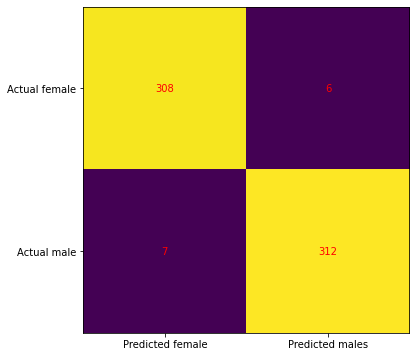

In [14]:
cm = confusion_matrix(y_test, rfc.predict(x_test))

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted female', 'Predicted males'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual female', 'Actual male'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()